<a href="https://colab.research.google.com/github/dimon-prog/ML-Learning/blob/main/ML_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


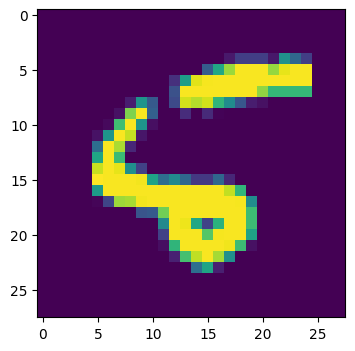

469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8718 - loss: 0.4438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ax.imshow(test_images[8])
plt.show()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
model.fit(train_images, train_labels, epochs=1, batch_size=128)
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
print(predictions[8].argmax())



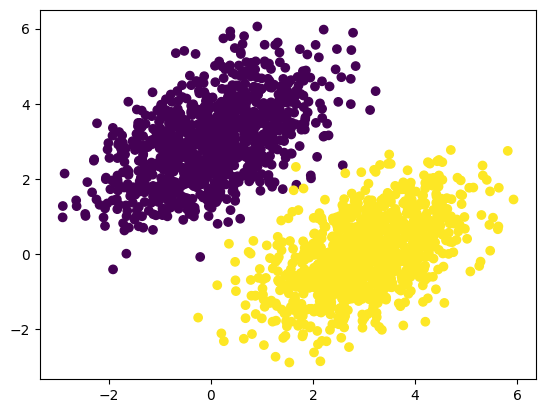

Loss at step 0: 3.2809
Loss at step 1: 0.2694
Loss at step 2: 0.1288
Loss at step 3: 0.1037
Loss at step 4: 0.0946
Loss at step 5: 0.0881
Loss at step 6: 0.0824
Loss at step 7: 0.0773
Loss at step 8: 0.0726
Loss at step 9: 0.0684
Loss at step 10: 0.0645
Loss at step 11: 0.0610
Loss at step 12: 0.0578
Loss at step 13: 0.0548
Loss at step 14: 0.0522
Loss at step 15: 0.0497
Loss at step 16: 0.0475
Loss at step 17: 0.0455
Loss at step 18: 0.0437
Loss at step 19: 0.0420
Loss at step 20: 0.0405
Loss at step 21: 0.0391
Loss at step 22: 0.0378
Loss at step 23: 0.0367
Loss at step 24: 0.0356
Loss at step 25: 0.0347
Loss at step 26: 0.0338
Loss at step 27: 0.0330
Loss at step 28: 0.0323
Loss at step 29: 0.0316
Loss at step 30: 0.0310
Loss at step 31: 0.0305
Loss at step 32: 0.0300
Loss at step 33: 0.0295
Loss at step 34: 0.0291
Loss at step 35: 0.0287
Loss at step 36: 0.0284
Loss at step 37: 0.0281
Loss at step 38: 0.0278
Loss at step 39: 0.0275


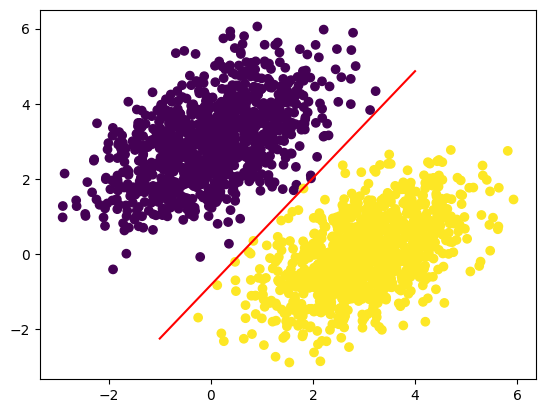

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0, 3], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3, 0], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
 np.ones((num_samples_per_class, 1), dtype="float32")))
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))
def model(inputs):
    return tf.matmul(inputs, W) + b
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")


predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions > 0.5)
plt.show()





